In [21]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import tqdm
import sklearn
import tensorflow as tf
from collections import Counter


In [78]:
df = pd.read_csv('C:\\Users\\sshet\\Documents\\GitHub\\SameerEric\\Paper1_WebData_Final.csv')

In [79]:
df.columns

Index(['test_date', 'nid', 'L500k', 'L1k', 'L2k', 'L3k', 'L4k', 'L6k', 'L8k',
       'R500k', 'R1k', 'R2k', 'R3k', 'R4k', 'R6k', 'R8k', 'gender', 'naics',
       'age_group', 'region', 'NAICS_descr'],
      dtype='object')

In [80]:
L500 = np.array(df['L500k'])
L1k = np.array(df['L1k'])
L2k = np.array(df['L2k'])
L3k = np.array(df['L3k'])
L4k = np.array(df['L4k'])
L6k = np.array(df['L6k'])
L8k = np.array(df['L8k'])
R500 = np.array(df['R500k'])
R1k = np.array(df['R1k'])
R3k = np.array(df['R3k'])
R4k = np.array(df['R4k'])
R6k = np.array(df['R6k'])
R8k = np.array(df['R8k'])
gender = np.array(df['gender'])
ageGroup = np.array(df['age_group'])
industry = np.array(df['NAICS_descr'])
naics = np.array(df['naics'])

In [81]:
industry_counter = Counter(industry)
unique_industries = sorted(industry_counter)
industry_mapping = {industry: index + 1 for index, industry in enumerate(unique_industries)}

industry_numbers = [industry_mapping[industry_title] for industry_title in industry]

unique_gender = Counter(gender)
gender_mapping = {gender: index + 1 for index, gender in enumerate(unique_gender)}
gender_numbers = [gender_mapping[gender_title] for gender_title in gender]

In [84]:
data = pd.DataFrame({
    'L500': L500,
    'L1k': L1k,
    'L2k': L2k,
    'L3k': L3k,
    'L4k': L4k,
    'L6k': L6k,
    'L8k': L8k,
    'R500': R500,
    'R1k': R1k,
    'R3k': R3k,
    'R4k': R4k,
    'R6k': R6k,
    'R8k': R8k,
    'Gender': gender_numbers,  # Assuming gender is already converted to numerical if needed
    'AgeGroup': ageGroup,
    'Industry': industry_numbers,  # Assuming you've already converted industry to numbers
})

print(f"Original DataFrame had {len(data)} rows.")

hearing_sum = data.loc[:, 'L500':'R8k'].sum(axis=1)

data = data[hearing_sum >= 800]

print(f"After filtering, DataFrame has {len(data_filtered)} rows.")

Original DataFrame had 1114966 rows.
After filtering, DataFrame has 658409 rows.


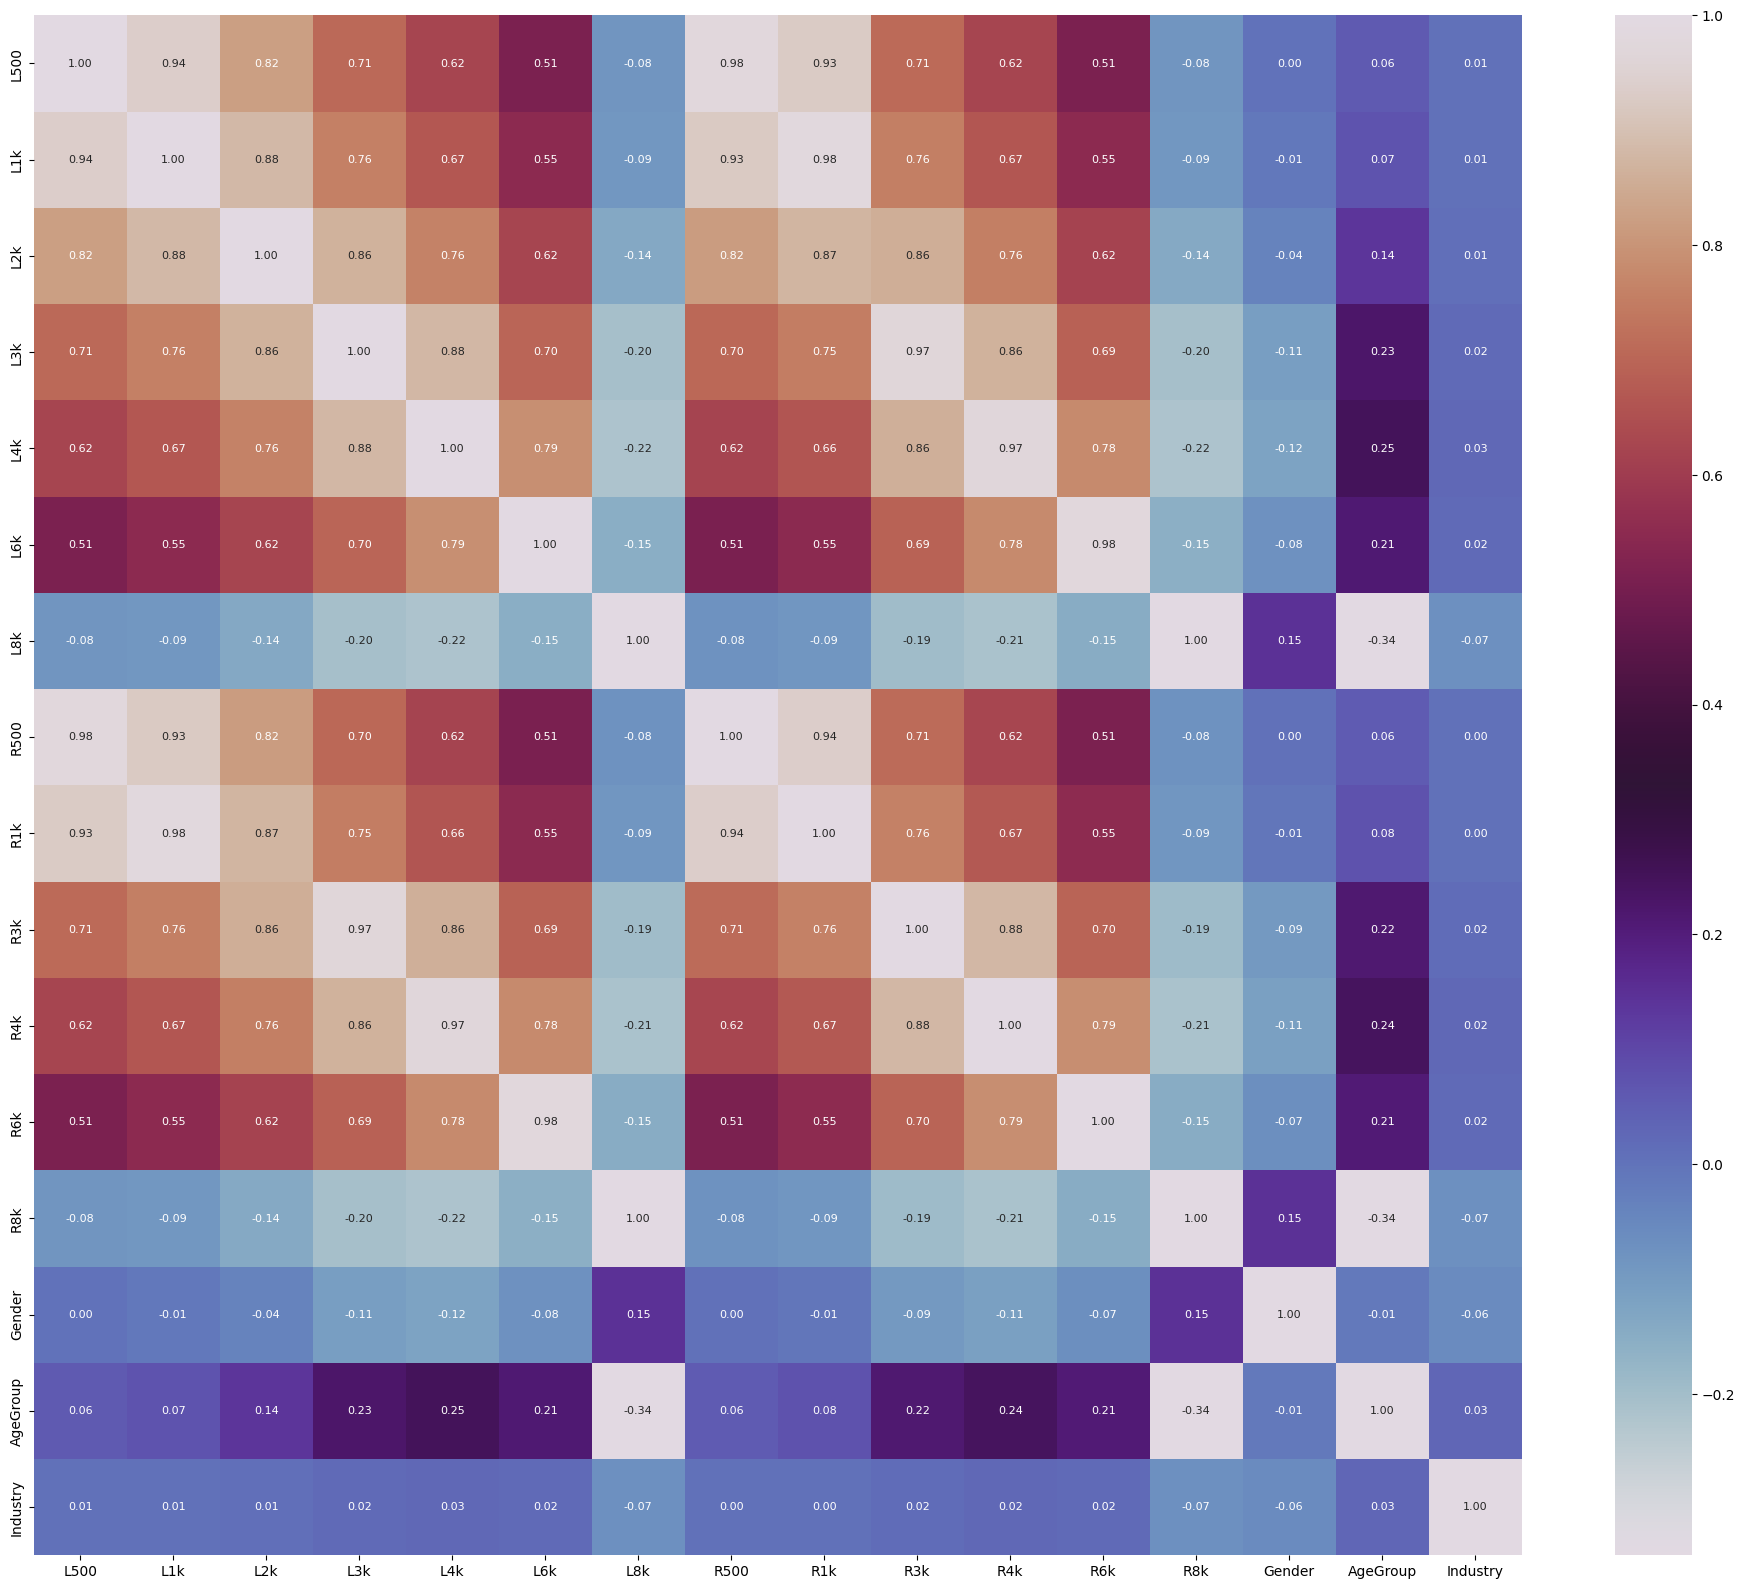

In [83]:
corr = data.corr()

plt.figure(figsize=(24, 20)) 
sns.heatmap(corr, annot=True, cmap="twilight", fmt=".2f", annot_kws={"size": 8})
plt.show()

1114966
